In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('extended_songs.csv')

# Define the features to be normalized
features_to_normalize = ['danceability', 'energy', 'speechiness']

# Normalize the features
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


In [2]:
# Select the features for clustering
df_selected = df[features_to_normalize]


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

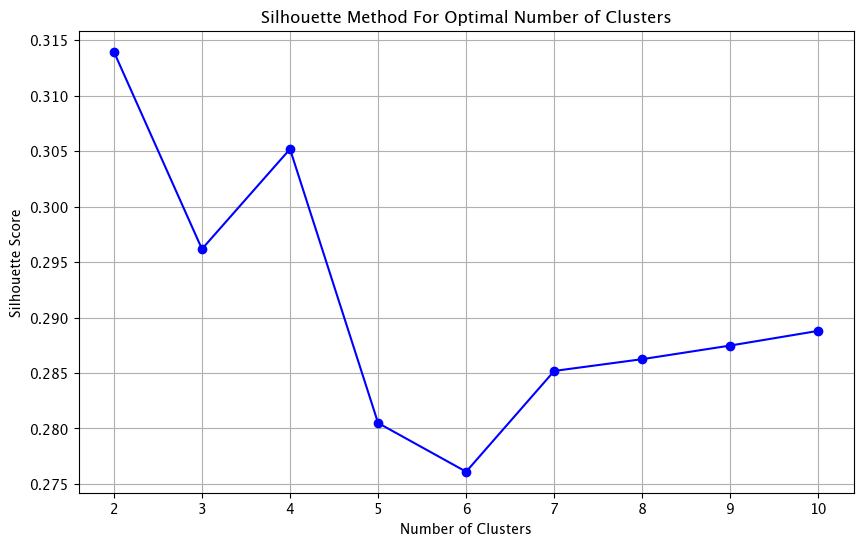

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of possible cluster numbers to try
cluster_numbers = range(2, 11)  # Start from 2 because silhouette_score requires at least 2 clusters

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Perform KMeans for each number of clusters, save the silhouette score
for k in cluster_numbers:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_selected)
    score = silhouette_score(df_selected, model.labels_, metric='euclidean')
    silhouette_scores.append(score)

# Plot the Silhouette Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [4]:
# Apply KMeans clustering with 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=1)
kmeans4.fit(df_selected)

# Calculate and print the Silhouette Score for 4 clusters
score4 = silhouette_score(df_selected, kmeans4.labels_, metric='euclidean')
print('Silhouette Score for 4 clusters: %.3f' % score4)


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.305


In [5]:
# Add the KMeans cluster membership with 4 clusters to the dataset
df['kmeans4_cluster'] = kmeans4.labels_


In [6]:
# Apply KMeans clustering with 7 clusters
kmeans7 = KMeans(n_clusters=7, random_state=1)
kmeans7.fit(df_selected)

# Calculate and print the Silhouette Score for 7 clusters
score7 = silhouette_score(df_selected, kmeans7.labels_, metric='euclidean')
print('Silhouette Score for 7 clusters: %.3f' % score7)


Silhouette Score for 7 clusters: 0.285


/Users/azadkader/anaconda3/envs/conda_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Add the KMeans cluster membership with 7 clusters to the dataset
df['kmeans7_cluster'] = kmeans7.labels_


In [9]:
import pickle

# Save the KMeans model with 4 clusters
pickle.dump(kmeans4, open("kmeans4.pkl", "wb"))

# Save the KMeans model with 7 clusters
pickle.dump(kmeans7, open("kmeans7.pkl", "wb"))

# Save the final dataset
df.to_csv("final_dataset.csv", index=False)


In [10]:
df = pd.read_csv('final_dataset.csv')
df.head()

,song,artist,source,id,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,kmeans4_cluster,kmeans7_cluster
0,Beggin',Måneskin,not_hot,3k79jB4aGmMDUQzEwa46Rz,0.434940,0.521834,5,-5.745,1,0.038104,...,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4,2,3
1,STAY (with Justin Bieber),The Kid LAROI,not_hot,59uQI0PADDKeE6UZDTJEe8,0.442169,0.677948,6,-5.382,1,0.014521,...,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,1,3
2,good 4 u,Olivia Rodrigo,not_hot,1Lo0QY9cvc8sUB2vnIOxDT,0.677108,0.599345,8,-5.520,1,0.003485,...,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4,0,5
3,Bad Habits,Ed Sheeran,not_hot,1s7oOCT8vauUh01PbJD6ps,0.781928,0.816594,11,-5.196,1,0.016148,...,107.008,audio_features,1s7oOCT8vauUh01PbJD6ps,spotify:track:1s7oOCT8vauUh01PbJD6ps,https://api.spotify.com/v1/tracks/1s7oOCT8vauU...,https://api.spotify.com/v1/audio-analysis/1s7o...,239318,4,1,1
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,not_hot,0yLdNVWF3Srea0uzk55zFn,0.671084,0.684498,0,-4.325,1,0.050651,...,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,1,1


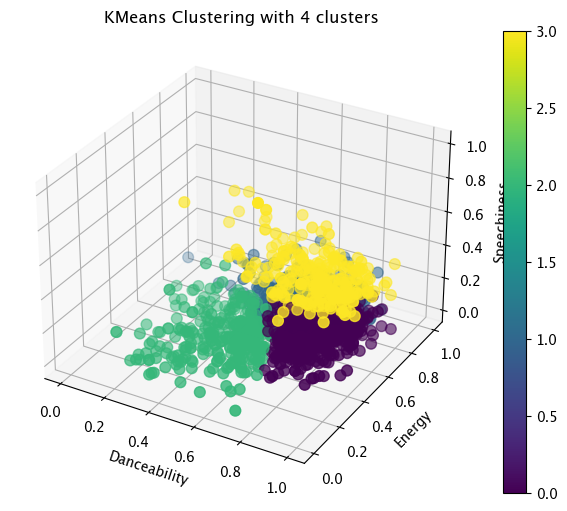

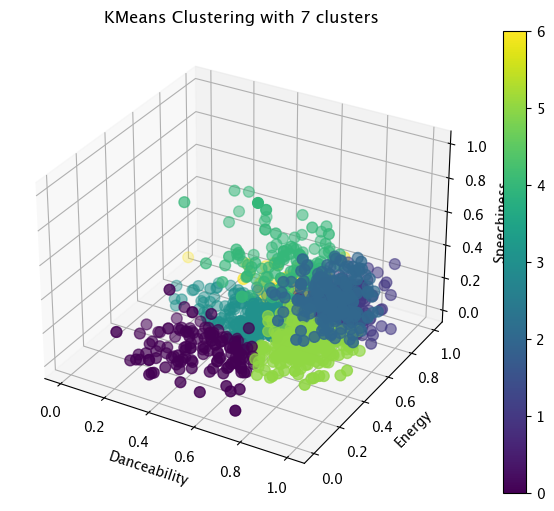

In [11]:
# 3D plot for 4 clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['danceability'], df['energy'], df['speechiness'], c=df['kmeans4_cluster'], s=60)
ax.set_title('KMeans Clustering with 4 clusters')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Speechiness')
plt.colorbar(scatter)
plt.show()

# 3D plot for 7 clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['danceability'], df['energy'], df['speechiness'], c=df['kmeans7_cluster'], s=60)
ax.set_title('KMeans Clustering with 7 clusters')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Speechiness')
plt.colorbar(scatter)
plt.show()

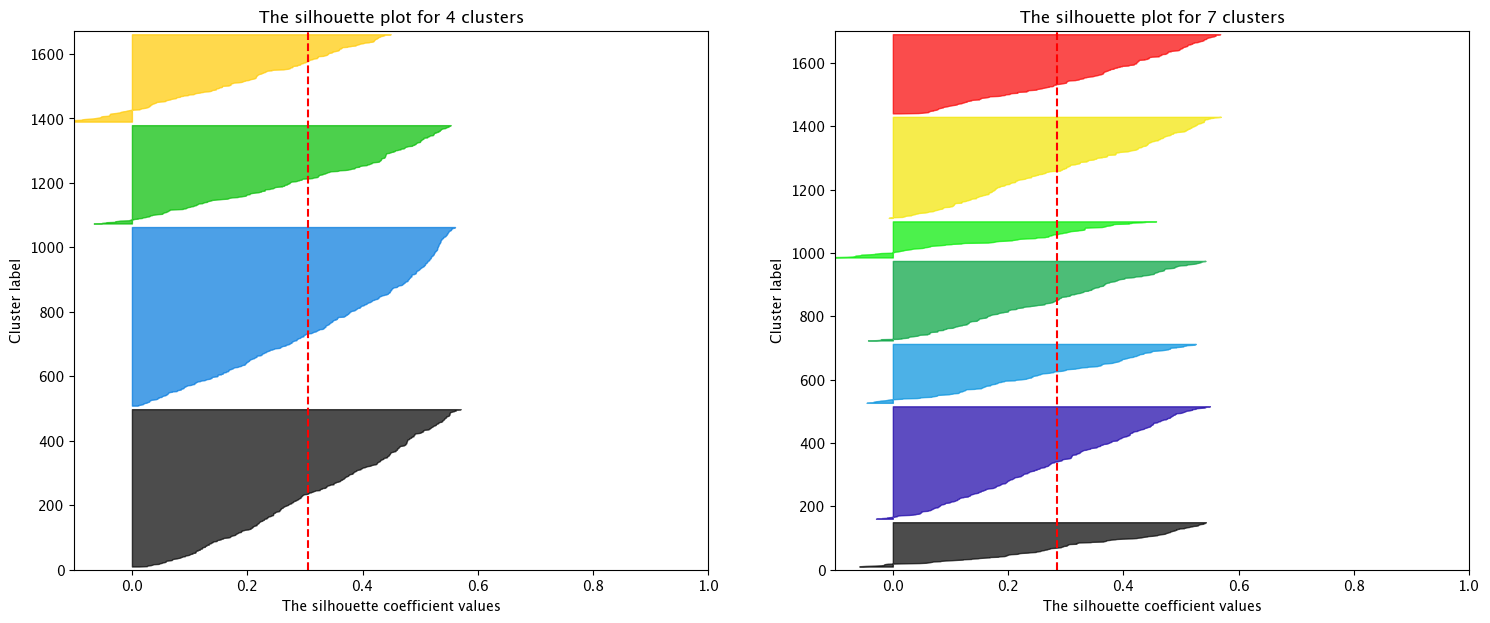

In [12]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Generate silhouette samples for both models
silhouette_samples_4 = silhouette_samples(df_selected, df['kmeans4_cluster'])
silhouette_samples_7 = silhouette_samples(df_selected, df['kmeans7_cluster'])

# Create subplots for the scatter plots of the two models
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# 1st subplot for 4 clusters
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_selected) + (4 + 1) * 10])
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = silhouette_samples_4[df['kmeans4_cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
ax1.set_title('The silhouette plot for 4 clusters')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')
ax1.axvline(x=score4, color="red", linestyle="--")

# 2nd subplot for 7 clusters
ax2.set_xlim([-0.1, 1])
ax2.set_ylim([0, len(df_selected) + (7 + 1) * 10])
y_lower = 10
for i in range(7):
    ith_cluster_silhouette_values = silhouette_samples_7[df['kmeans7_cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / 7)
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
ax2.set_title('The silhouette plot for 7 clusters')
ax2.set_xlabel('The silhouette coefficient values')
ax2.set_ylabel('Cluster label')
ax2.axvline(x=score7, color="red", linestyle="--")

plt.show()